In [1]:
import pandas as pd
import numpy as np

In [2]:
traindf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\train.csv')
valdf = pd.read_csv('C:\\Users\\cheek\\ML-7641-Team14\\dataset\output\\dataset_mar_23\\val.csv')

# Duplicate rows check

In [3]:
duplicate_rows = traindf[traindf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,num_sub,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


In [4]:
duplicate_rows = valdf[valdf.duplicated(['video_id'], keep=False)]
duplicate_rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,num_sub,trending_date,tags,views per day,likes per day,dislikes per day,comments per day,thumbnail_link,rating,description,trending


# Drop Columns
TDIL Channel title and title are different things

In [5]:
traindf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)
valdf.drop(['channelId','publishedAt', 'trending_date', 'views per day', 'likes per day', 'dislikes per day', 'comments per day', 'thumbnail_link', 'rating','video_id'], axis=1, inplace=True)

In [6]:
traindf['lang'] = traindf['title'] + ' ' + traindf['tags'] + ' ' + traindf['description'] + ' ' + traindf['channelTitle']
valdf['lang'] = valdf['title'] + ' ' + valdf['tags'] + ' ' + valdf['description'] + ' ' + valdf['channelTitle']
traindf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)
valdf.drop(['title', 'tags', 'description', 'channelTitle'], axis=1, inplace=True)

In [7]:
print(traindf.head())
print(valdf.head())

   categoryId   num_sub  trending  \
0          24    754000         1   
1          17    314000         1   
2          22   1290000         1   
3          22  10000000         1   
4          26    145000         0   

                                                lang  
0  Power Book II: Ghost | Official Trailer | Seas...  
1  Julian Newman WENT OFF Against Tristan Jass an...  
2  GET READY WITH US TO GO TO LES DO MAKEUP'S AND...  
3  Binging with Babish: Tater Tots from Breaking ...  
4  My Friend sister Birthday Cake doll cake kaise...  
   categoryId   num_sub  trending  \
0           2    511000         1   
1          26     24400         0   
2          10  26700000         1   
3          28  10700000         1   
4          28   2940000         1   

                                                lang  
0  What's Next For The Boat That Was Sunk At The ...  
1  Tapa Kimchi Rice | Home Foodie Cooking Show #M...  
2  TWICE READY TO BE Opening Trailer JYP Entertai...  
3  P

In [8]:
traindf

,categoryId,num_sub,trending,lang
0,24,754000,1,Power Book II: Ghost | Official Trailer | Seas...
1,17,314000,1,Julian Newman WENT OFF Against Tristan Jass an...
2,22,1290000,1,GET READY WITH US TO GO TO LES DO MAKEUP'S AND...
3,22,10000000,1,Binging with Babish: Tater Tots from Breaking ...
4,26,145000,0,My Friend sister Birthday Cake doll cake kaise...
...,...,...,...,...
4319,10,7960,1,Aaron Mercury - Apaga La Luz Aaron|Mercury|Apa...
4320,20,934000,0,Sonic And Amy Funny Dance - Sonic And Amy Stor...
4321,2,12800,0,Check This Out! Custom Skoolie Exterior Tour!...
4322,22,33100,0,Viral aiya susanti #shorts drako|drama lucu|fu...


# Feature Engineering
Cleaning, scaling, normalizing

In [9]:
def lognormalizesubs(df):
    df['log_subs'] = np.log1p(df['num_sub'])

In [10]:
lognormalizesubs(traindf)
lognormalizesubs(valdf)

### Preprocessing the lang

In [11]:
null_count = traindf['lang'].isnull().sum()

In [12]:
null_count

240

In [13]:
print(traindf[traindf['lang'].isnull()])

      categoryId  num_sub  trending lang   log_subs
27            28   161000         0  NaN  11.989166
57            15   577000         0  NaN  13.265599
68            27   143000         0  NaN  11.870607
90            28   327000         0  NaN  12.697719
132            2  2370000         0  NaN  14.678401
...          ...      ...       ...  ...        ...
4186          20  4720000         1  NaN  15.367320
4226          23   219000         0  NaN  12.296832
4253          24    51700         0  NaN  10.853232
4281          26    79100         0  NaN  11.278481
4314          20    19700         0  NaN   9.888425

[240 rows x 5 columns]


In [14]:
traindf.dropna(subset=['lang'], inplace=True)
valdf.dropna(subset=['lang'], inplace=True)

In [15]:
traindf = traindf.reset_index(drop=True)
valdf = valdf.reset_index(drop=True)

In [16]:
smallest_lang_value = min(traindf['lang'], key=lambda x: len(x))
print(smallest_lang_value)

Human elevator [none] #parkour Oliver Nordin


In [17]:
import string
import re
import nltk
nltk.data.path.append('C:/Users/cheek/ML-7641-Team14/shravan/nltk_data')
stopwords = nltk.corpus.stopwords.words('english')

In [18]:
max_length = traindf['lang'].apply(len).max()
print(max_length)

5510


In [19]:
max_length_index = traindf['lang'].str.len().idxmax()
row_with_max_length = traindf.loc[max_length_index]
row_with_max_length.apply(lambda x: print(x))

1
323000
0
Robot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi | 3.0 full movie|3.0 full movie in tamil|2.0 full movie|3.0 full movie in hindi|robot 3.0 movie|3.0 in 2.0 movie|3.0 rajinikanth|3.0 trailer tamil|salman in 3.0 movie|2.0 movie|3.0 trailer|robot 3.0 full movie|robot 3.0 trailer full movie|robot 3.0 movies|full movie 2.0|3.0 rajinikanth tamil|3.0 rajinikanth hindi|2.0 full movie in hindi|robot 3.0|full movie|robot 3.0 full hd movie|rajnikant new movie|new south movie 2023|robot #robot3  #AkshayKumar #ShankarRobot 3.0 Full Movie HD | Rajnikant  | Katrina Kaif | Shankar | 2023 | Full  Sci-Fi Movie in Hindi |After a decade of research, scientist Vaseegaran creates a sophisticated android humanoid robot with the help of his assistants, Siva and Ravi, in order to commission it into the Indian Army. He introduces the robot, named Chitti, at a robotics conference in Chennai. Chitti helps Sana, Vaseegaran's medical student girlfriend, c

categoryId    None
num_sub       None
trending      None
lang          None
log_subs      None
Name: 1949, dtype: object

In [20]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [21]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('C:\\Users\\cheek\\ML-7641-Team14\\shravan\\vecs.kv')

In [22]:
wv.similarity('apple', 'orange')

0.39203462

In [23]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct or (token.text not in wv.key_to_index):
            continue
        filtered_tokens.append(token.lemma_)
        
    return filtered_tokens

In [24]:
def vectorize(filtered):
    return wv.get_mean_vector(filtered)

In [25]:
traindf['tokens'] = traindf['lang'].apply(lambda x: preprocess(x))
traindf['vector'] = traindf['tokens'].apply(lambda x: vectorize(x))

In [26]:
valdf['tokens'] = valdf['lang'].apply(lambda x: preprocess(x))
valdf['vector'] = valdf['tokens'].apply(lambda x: vectorize(x))

In [27]:
unique = traindf['tokens'].explode().unique()

In [28]:
sample_words = [word for word in unique if word in wv.key_to_index]
sample = np.array([wv[word] for word in sample_words])

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample)

In [30]:
import matplotlib.pyplot as plt

c:\Users\cheek\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheek\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheek\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheek\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheek\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheek\minic

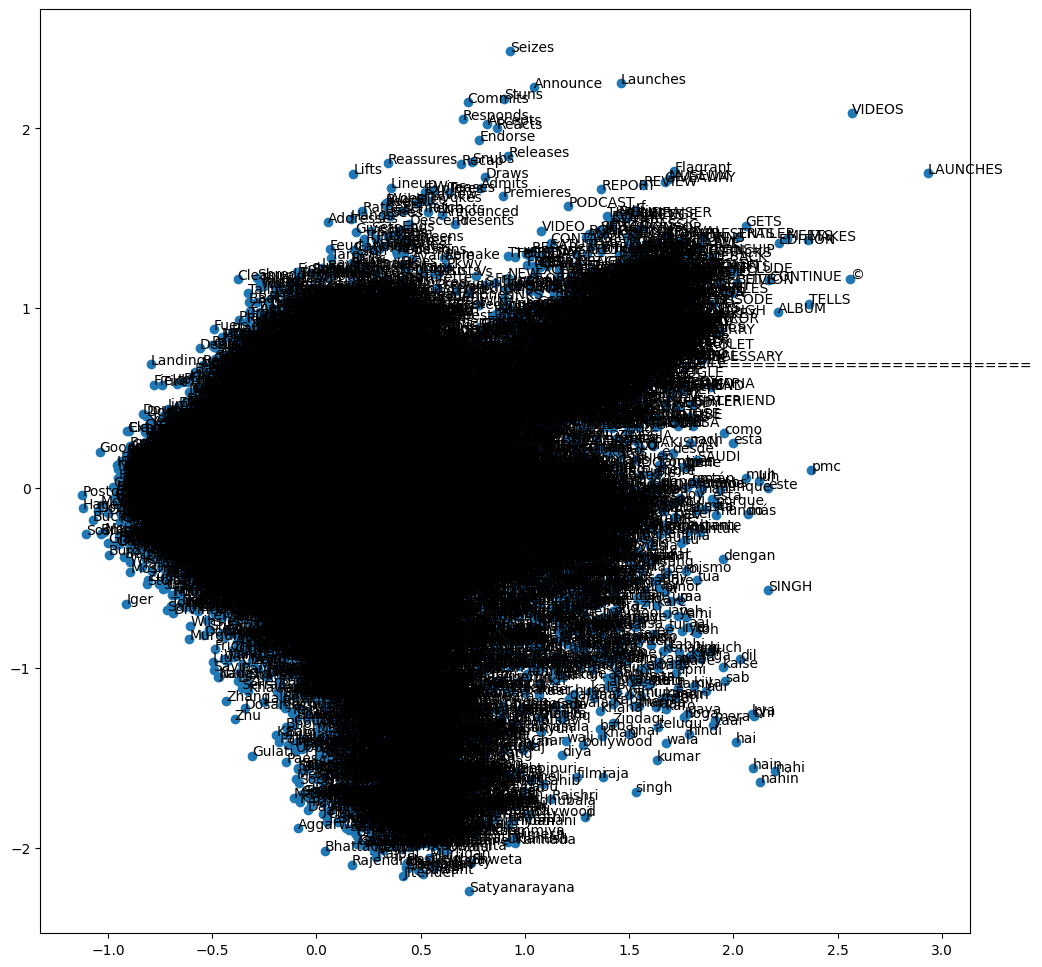

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(sample_words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

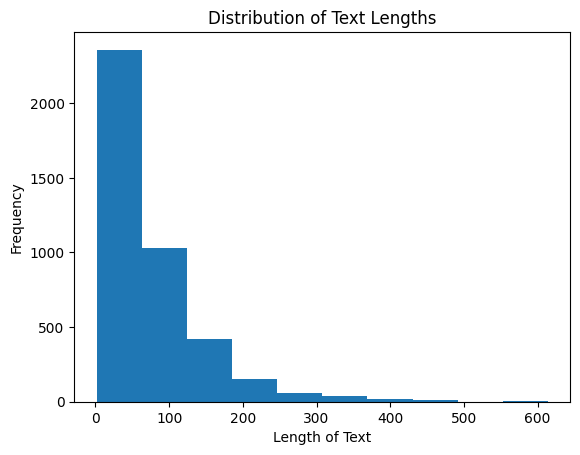

In [32]:
lengths = traindf['tokens'].apply(len)

plt.hist(lengths, bins=10)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Seperate prediction - y

In [33]:
y_train = traindf['trending']
y_val = valdf['trending']

In [34]:
X_train = np.stack(traindf['vector'])
X_test = np.stack(valdf['vector'])

In [35]:
X_train.shape

(4084, 300)

# Training w/ np array

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [37]:
traindf.columns

Index(['categoryId', 'num_sub', 'trending', 'lang', 'log_subs', 'tokens',
       'vector'],
      dtype='object')

In [39]:
# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM:")
print(confusion_matrix(y_val, svm_pred))
print(classification_report(y_val, svm_pred))
print("Accuracy:", accuracy_score(y_val, svm_pred))

SVM:
[[364 129]
 [ 62 449]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       493
           1       0.78      0.88      0.82       511

    accuracy                           0.81      1004
   macro avg       0.82      0.81      0.81      1004
weighted avg       0.81      0.81      0.81      1004

Accuracy: 0.8097609561752988


In [40]:
# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(rf_model.feature_importances_)

print("Random Forest:")
print(confusion_matrix(y_val, rf_pred))
print(classification_report(y_val, rf_pred))
print("Accuracy:", accuracy_score(y_val, rf_pred))

[0.00355803 0.00543375 0.00319439 0.00254509 0.00365634 0.00244131
 0.0090236  0.00271126 0.00223186 0.00263739 0.00291535 0.00206031
 0.00220198 0.00322662 0.00691444 0.00261035 0.0109483  0.00253622
 0.00195049 0.00296411 0.00260842 0.00526372 0.00289789 0.00312632
 0.0027693  0.00252654 0.00224129 0.00253898 0.00351668 0.0025837
 0.00336795 0.00277923 0.00252329 0.00968639 0.00308218 0.00257726
 0.0037974  0.0030189  0.00537861 0.00247077 0.00246176 0.00321451
 0.00220243 0.0021612  0.00508909 0.00310649 0.00246513 0.00255369
 0.0036425  0.00251899 0.00370032 0.00236715 0.00263932 0.00295895
 0.00232493 0.00278767 0.0026882  0.00253686 0.00412155 0.00320886
 0.00247514 0.00254455 0.00288929 0.00315362 0.00458111 0.00697373
 0.0039779  0.00217482 0.00272646 0.00303932 0.00365375 0.00260584
 0.00327206 0.00206267 0.00192779 0.00359557 0.00435403 0.00216469
 0.00256208 0.00194505 0.00732891 0.00574113 0.00256751 0.00354073
 0.00236621 0.00508629 0.00315764 0.001687   0.00414647 0.00199

In [41]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(confusion_matrix(y_val, lr_pred))
print(classification_report(y_val, lr_pred))
print("Accuracy:", accuracy_score(y_val, lr_pred))

Logistic Regression:
[[348 145]
 [ 82 429]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       493
           1       0.75      0.84      0.79       511

    accuracy                           0.77      1004
   macro avg       0.78      0.77      0.77      1004
weighted avg       0.78      0.77      0.77      1004

Accuracy: 0.7739043824701195


# NN

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [43]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
       # x = torch.sigmoid(x)
        return x

In [44]:
class AdvancedNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(AdvancedNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.5)
        )
        
        self.layer2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.5)
        )
        
        self.layer3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5)
        )
        
        self.layer4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return x

In [45]:
train_data = torch.tensor(X_train, dtype=torch.float)
train_labels = torch.tensor(y_train, dtype=torch.long)
val_data = torch.tensor(X_test, dtype=torch.float)
val_labels = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(train_data, train_labels)
val_dataset = TensorDataset(val_data, val_labels)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [46]:
input_size = 300
num_classes = 2
#model = SimpleNN(input_size, num_classes)
model = AdvancedNN(input_size, num_classes)

learning_rate = 0.001
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}")

    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_dataloader)
    val_accuracy = correct / total
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1, Train Loss: 0.6056628671940416
Epoch 1, Validation Loss: 0.49025419633835554, Validation Accuracy: 0.7729083665338645
Epoch 2, Train Loss: 0.5142706767655909
Epoch 2, Validation Loss: 0.46821191534399986, Validation Accuracy: 0.7858565737051793
Epoch 3, Train Loss: 0.47563710855320096
Epoch 3, Validation Loss: 0.4596212236210704, Validation Accuracy: 0.796812749003984
Epoch 4, Train Loss: 0.4550440111197531
Epoch 4, Validation Loss: 0.4551769308745861, Validation Accuracy: 0.8117529880478087
Epoch 5, Train Loss: 0.45030693570151925
Epoch 5, Validation Loss: 0.44979717675596476, Validation Accuracy: 0.8047808764940239
Epoch 6, Train Loss: 0.4342188936425373
Epoch 6, Validation Loss: 0.47628355026245117, Validation Accuracy: 0.7798804780876494
Epoch 7, Train Loss: 0.43260300694964826
Epoch 7, Validation Loss: 0.4632433708757162, Validation Accuracy: 0.796812749003984
Epoch 8, Train Loss: 0.4298697040649131
Epoch 8, Validation Loss: 0.47927119163796306, Validation Accuracy: 0.800

# Training with df

Pretty much using some other features

In [62]:
Xdf_train = pd.DataFrame(X_train)

In [63]:
Xdf_test = pd.DataFrame(X_test)

In [64]:
Xdf_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,0.003419,-0.012605,-0.054438,-0.011793,0.005213,-0.040189,-0.019612,-0.008356,-0.002161,0.007417
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,0.007731,-0.007100,-0.046828,0.010370,-0.013127,-0.034672,0.009649,-0.016757,0.003185,0.016839
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,0.015814,0.007675,-0.038544,0.036608,-0.013988,-0.077762,-0.036571,-0.003778,-0.001089,0.016832
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.006662,0.015656,-0.055904,0.013691,0.000369,-0.021446,0.012411,-0.036735,0.013220,-0.000223
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,-0.030791,0.005275,-0.059791,-0.014414,0.000138,-0.041190,0.003861,-0.003530,-0.041935,-0.014488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,0.003202,-0.002476,-0.053833,0.027181,-0.010399,-0.015832,0.001375,-0.007146,0.016459,0.012746
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.004064,0.029870,-0.041622,-0.010662,-0.011063,-0.028395,0.003778,-0.045244,0.007093,0.001836
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,-0.015455,-0.004521,-0.024251,-0.005403,0.007940,-0.032007,0.002156,-0.022578,0.020213,-0.022701
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.001806,0.008763,-0.097177,-0.022242,0.010019,0.001093,0.010236,0.016268,-0.007597,0.017021


In [65]:
traindf.columns

Index(['categoryId', 'num_sub', 'trending', 'lang', 'log_subs', 'tokens',
       'vector'],
      dtype='object')

In [66]:
trdf = traindf[['log_subs']]

In [67]:
traindf

,categoryId,num_sub,trending,lang,log_subs,tokens,vector
0,24,754000,1,Power Book II: Ghost | Official Trailer | Seas...,13.533149,"[Power, Book, II, ghost, official, Trailer, Se...","[0.03732416, 0.0017805065, -0.010998716, -0.01..."
1,17,314000,1,Julian Newman WENT OFF Against Tristan Jass an...,12.657151,"[Julian, Newman, go, Tristan, Jass, Carson, Ro...","[0.027126025, 0.018631326, -0.04319948, 0.0109..."
2,22,1290000,1,GET READY WITH US TO GO TO LES DO MAKEUP'S AND...,14.070154,"[ready, LES, MAKEUP, KB, EVENT, Murillo, SOCIA...","[-0.0092903115, 0.0015797918, 0.041077197, 0.0..."
3,22,10000000,1,Binging with Babish: Tater Tots from Breaking ...,16.118096,"[binge, Babish, Tater, Tots, break, bad, episo...","[0.014575143, -0.0015489127, -0.016263451, 0.0..."
4,26,145000,0,My Friend sister Birthday Cake doll cake kaise...,11.884496,"[friend, sister, Birthday, Cake, doll, cake, k...","[-0.015716612, -0.038114376, -0.0040804143, 0...."
...,...,...,...,...,...,...,...
4079,10,7960,1,Aaron Mercury - Apaga La Luz Aaron|Mercury|Apa...,8.982310,"[Aaron, Mercury, La, Luz, music, video, Aaron,...","[0.0014932244, -0.006056428, -0.0069105057, -0..."
4080,20,934000,0,Sonic And Amy Funny Dance - Sonic And Amy Stor...,13.747233,"[sonic, Amy, Funny, dance, Sonic, Amy, Story, ...","[0.010417218, -0.007498604, -0.008977798, 0.03..."
4081,2,12800,0,Check This Out! Custom Skoolie Exterior Tour!...,9.457279,"[check, Custom, Exterior, Tour, travel, tour, ...","[0.0016421076, 0.008860779, -0.028481334, 0.00..."
4082,22,33100,0,Viral aiya susanti #shorts drako|drama lucu|fu...,10.407319,"[viral, short, Drama]","[0.0035358805, -0.032018986, -0.030157546, 0.0..."


In [68]:
trdf

,log_subs
0,13.533149
1,12.657151
2,14.070154
3,16.118096
4,11.884496
...,...
4079,8.982310
4080,13.747233
4081,9.457279
4082,10.407319


In [69]:
tedf = valdf[['log_subs']]

In [70]:
resultTrain = pd.concat([Xdf_train, trdf], axis=1, sort=False)
resultTest = pd.concat([Xdf_test, tedf], axis=1, sort=False)

In [71]:
resultTrain

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,log_subs
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,-0.012605,-0.054438,-0.011793,0.005213,-0.040189,-0.019612,-0.008356,-0.002161,0.007417,13.533149
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,-0.007100,-0.046828,0.010370,-0.013127,-0.034672,0.009649,-0.016757,0.003185,0.016839,12.657151
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,0.007675,-0.038544,0.036608,-0.013988,-0.077762,-0.036571,-0.003778,-0.001089,0.016832,14.070154
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.015656,-0.055904,0.013691,0.000369,-0.021446,0.012411,-0.036735,0.013220,-0.000223,16.118096
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,0.005275,-0.059791,-0.014414,0.000138,-0.041190,0.003861,-0.003530,-0.041935,-0.014488,11.884496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,-0.002476,-0.053833,0.027181,-0.010399,-0.015832,0.001375,-0.007146,0.016459,0.012746,8.982310
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.029870,-0.041622,-0.010662,-0.011063,-0.028395,0.003778,-0.045244,0.007093,0.001836,13.747233
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,-0.004521,-0.024251,-0.005403,0.007940,-0.032007,0.002156,-0.022578,0.020213,-0.022701,9.457279
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.008763,-0.097177,-0.022242,0.010019,0.001093,0.010236,0.016268,-0.007597,0.017021,10.407319


In [72]:
resultTrain.columns = resultTrain.columns.astype(str)
resultTest.columns = resultTest.columns.astype(str)

In [73]:
resultTrain

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,log_subs
0,0.037324,0.001781,-0.010999,-0.014390,0.008327,0.015050,0.002750,-0.008287,0.029170,0.022423,...,-0.012605,-0.054438,-0.011793,0.005213,-0.040189,-0.019612,-0.008356,-0.002161,0.007417,13.533149
1,0.027126,0.018631,-0.043199,0.010921,0.018408,-0.020090,-0.002293,-0.030937,0.034213,0.029412,...,-0.007100,-0.046828,0.010370,-0.013127,-0.034672,0.009649,-0.016757,0.003185,0.016839,12.657151
2,-0.009290,0.001580,0.041077,0.008362,-0.016564,0.003744,-0.026991,-0.025944,-0.042773,0.002404,...,0.007675,-0.038544,0.036608,-0.013988,-0.077762,-0.036571,-0.003778,-0.001089,0.016832,14.070154
3,0.014575,-0.001549,-0.016263,0.012496,0.005753,0.014698,0.013166,-0.024183,0.035358,-0.003001,...,0.015656,-0.055904,0.013691,0.000369,-0.021446,0.012411,-0.036735,0.013220,-0.000223,16.118096
4,-0.015717,-0.038114,-0.004080,0.052129,0.016092,0.027980,0.015357,-0.033920,0.002469,0.001617,...,0.005275,-0.059791,-0.014414,0.000138,-0.041190,0.003861,-0.003530,-0.041935,-0.014488,11.884496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4079,0.001493,-0.006056,-0.006911,-0.004492,-0.012382,-0.018271,0.001261,-0.026307,-0.012953,0.005960,...,-0.002476,-0.053833,0.027181,-0.010399,-0.015832,0.001375,-0.007146,0.016459,0.012746,8.982310
4080,0.010417,-0.007499,-0.008978,0.032899,-0.010673,-0.002196,0.014975,-0.008162,0.000760,-0.001148,...,0.029870,-0.041622,-0.010662,-0.011063,-0.028395,0.003778,-0.045244,0.007093,0.001836,13.747233
4081,0.001642,0.008861,-0.028481,0.004189,-0.002797,0.015856,0.023422,-0.019607,0.038859,0.017187,...,-0.004521,-0.024251,-0.005403,0.007940,-0.032007,0.002156,-0.022578,0.020213,-0.022701,9.457279
4082,0.003536,-0.032019,-0.030158,0.042114,-0.038139,-0.043196,-0.026681,-0.053684,0.019157,-0.021900,...,0.008763,-0.097177,-0.022242,0.010019,0.001093,0.010236,0.016268,-0.007597,0.017021,10.407319


In [74]:
svm_model = SVC()
svm_model.fit(resultTrain, y_train)
svm_pred = svm_model.predict(resultTest)

print("SVM:")
print(confusion_matrix(y_val, svm_pred))
print(classification_report(y_val, svm_pred))
print("Accuracy:", accuracy_score(y_val, svm_pred))

SVM:
[[114 379]
 [ 21 490]]
              precision    recall  f1-score   support

           0       0.84      0.23      0.36       493
           1       0.56      0.96      0.71       511

    accuracy                           0.60      1004
   macro avg       0.70      0.60      0.54      1004
weighted avg       0.70      0.60      0.54      1004

Accuracy: 0.601593625498008


In [75]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(X_test)

mse = ((y_pred - y_val) ** 2).mean()
rmse = mse ** 0.5
print('Root mean squared error:', rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 300
[LightGBM] [Info] Start training from score 0.531097
Root mean squared error: 0.3912821711431948


In [76]:
train_data = lgb.Dataset(resultTrain, label=y_train)

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(resultTest)

mse = ((y_pred - y_val) ** 2).mean()
rmse = mse ** 0.5
print('Root mean squared error:', rmse)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76753
[LightGBM] [Info] Number of data points in the train set: 4084, number of used features: 301
[LightGBM] [Info] Start training from score 0.531097
Root mean squared error: 0.38441133101705366
